In [235]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [236]:
df_1 = pd.read_excel("_Bank_Churn_Messy_Customer_info.xlsx")

In [237]:
df_1.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1


In [238]:
df_2 = pd.read_excel("Bank_Churn_Messy_Account_Info.xlsx")

In [239]:
df_2.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0
3,15619304,€159660.8,3,No,8,No,1
4,15701354,€0.0,2,No,1,No,0


In [240]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10001 non-null  int64  
 1   Surname          9998 non-null   object 
 2   CreditScore      10001 non-null  int64  
 3   Geography        10001 non-null  object 
 4   Gender           10001 non-null  object 
 5   Age              9998 non-null   float64
 6   Tenure           10001 non-null  int64  
 7   EstimatedSalary  10001 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 625.2+ KB


In [241]:
df_1.describe()

,CustomerId,CreditScore,Age,Tenure
count,1.000100e+04,10001.000000,9998.000000,10001.000000
mean,1.569093e+07,650.542946,38.920984,5.012699
std,7.193531e+04,96.658818,10.489116,2.892047
min,1.556570e+07,350.000000,18.000000,0.000000
25%,1.562852e+07,584.000000,32.000000,3.000000
50%,1.569073e+07,652.000000,37.000000,5.000000
75%,1.575323e+07,718.000000,44.000000,7.000000
max,1.581569e+07,850.000000,92.000000,10.000000


In [242]:
df_1.isnull().sum()

CustomerId         0
Surname            3
CreditScore        0
Geography          0
Gender             0
Age                3
Tenure             0
EstimatedSalary    0
dtype: int64

In [243]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerId      10002 non-null  int64 
 1   Balance         10002 non-null  object
 2   NumOfProducts   10002 non-null  int64 
 3   HasCrCard       10002 non-null  object
 4   Tenure          10002 non-null  int64 
 5   IsActiveMember  10002 non-null  object
 6   Exited          10002 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 547.1+ KB


In [244]:
df_2.describe()

,CustomerId,NumOfProducts,Tenure,Exited
count,1.000200e+04,10002.000000,10002.000000,10002.000000
mean,1.569093e+07,1.530094,5.012398,0.203759
std,7.193392e+04,0.581645,2.892060,0.402812
min,1.556570e+07,1.000000,0.000000,0.000000
25%,1.562852e+07,1.000000,3.000000,0.000000
50%,1.569073e+07,1.000000,5.000000,0.000000
75%,1.575323e+07,2.000000,7.000000,0.000000
max,1.581569e+07,4.000000,10.000000,1.000000


In [245]:
df_2.isnull().sum()

CustomerId        0
Balance           0
NumOfProducts     0
HasCrCard         0
Tenure            0
IsActiveMember    0
Exited            0
dtype: int64

In [246]:
merged_df = pd.merge(df_1, df_2, on='CustomerId', how='inner')

In [247]:
merged_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,8,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,1,No,0


In [248]:
merged_df.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52,€75075.31,2,No,3,No,1
10000,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10001,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10002,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10003,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0


In [249]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   Surname          10001 non-null  object 
 2   CreditScore      10004 non-null  int64  
 3   Geography        10004 non-null  object 
 4   Gender           10004 non-null  object 
 5   Age              10001 non-null  float64
 6   Tenure_x         10004 non-null  int64  
 7   EstimatedSalary  10004 non-null  object 
 8   Balance          10004 non-null  object 
 9   NumOfProducts    10004 non-null  int64  
 10  HasCrCard        10004 non-null  object 
 11  Tenure_y         10004 non-null  int64  
 12  IsActiveMember   10004 non-null  object 
 13  Exited           10004 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


In [250]:
merged_df.describe()

,CustomerId,CreditScore,Age,Tenure_x,NumOfProducts,Tenure_y,Exited
count,1.000400e+04,10004.000000,10001.000000,10004.000000,10004.000000,10004.000000,10004.000000
mean,1.569092e+07,650.568073,38.919108,5.012195,1.529988,5.012195,0.203719
std,7.193218e+04,96.665531,10.488725,2.891806,0.581635,2.891806,0.402782
min,1.556570e+07,350.000000,18.000000,0.000000,1.000000,0.000000,0.000000
25%,1.562839e+07,584.000000,32.000000,3.000000,1.000000,3.000000,0.000000
50%,1.569071e+07,652.000000,37.000000,5.000000,1.000000,5.000000,0.000000
75%,1.575322e+07,718.000000,44.000000,7.000000,2.000000,7.000000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,4.000000,10.000000,1.000000


In [251]:
merged_df.isnull().sum()

CustomerId         0
Surname            3
CreditScore        0
Geography          0
Gender             0
Age                3
Tenure_x           0
EstimatedSalary    0
Balance            0
NumOfProducts      0
HasCrCard          0
Tenure_y           0
IsActiveMember     0
Exited             0
dtype: int64

In [252]:
merged_df['Age'] = merged_df['Age'].fillna(merged_df['Age'].mean())

In [253]:
merged_df['Surname'] = merged_df['Surname'].fillna('Unknown')


In [254]:
merged_df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure_x           0
EstimatedSalary    0
Balance            0
NumOfProducts      0
HasCrCard          0
Tenure_y           0
IsActiveMember     0
Exited             0
dtype: int64

In [255]:
merged_df['Gender'].value_counts()

Gender
Male      5457
Female    4547
Name: count, dtype: int64

In [256]:
merged_df['Geography'].value_counts()

Geography
Germany    2509
Spain      2477
France     1741
French     1658
FRA        1619
Name: count, dtype: int64

In [257]:
merged_df['Geography'] = merged_df['Geography'].replace({
    'French': 'France',
    'FRA': 'France',
})


In [258]:
merged_df['Geography'].value_counts()

Geography
France     5018
Germany    2509
Spain      2477
Name: count, dtype: int64

<Axes: title={'center': 'Customer Distribution by Geography'}, xlabel='Geography'>

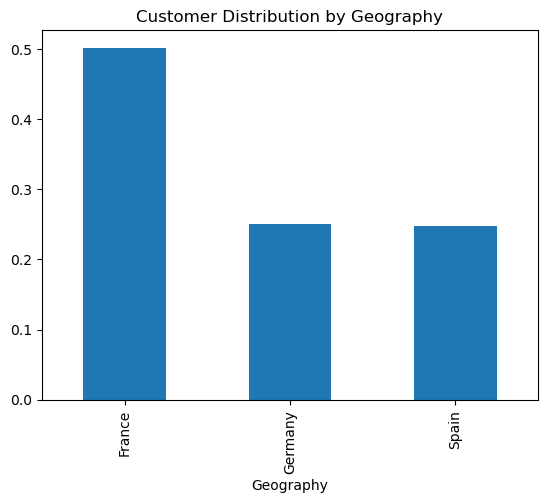

In [259]:
merged_df['Geography'].value_counts(normalize=True).plot(kind='bar', title='Customer Distribution by Geography')

In [260]:
# Comparing averages
merged_df.groupby('Geography')['CreditScore'].mean()


Geography
France     649.747310
Germany    651.453567
Spain      651.333872
Name: CreditScore, dtype: float64

<Axes: ylabel='proportion'>

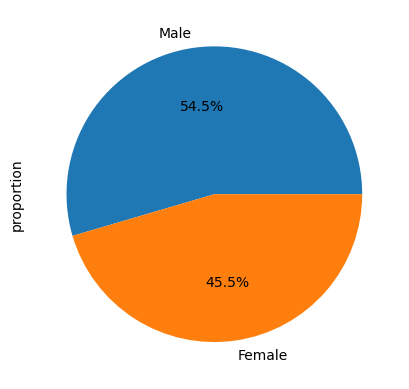

In [261]:
merged_df['Gender'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')

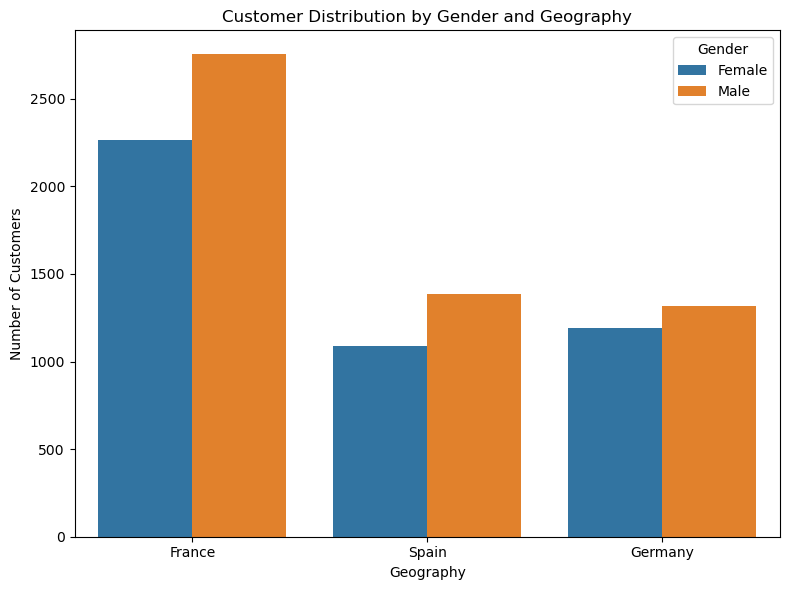

In [262]:
plt.figure(figsize=(8, 6))
sns.countplot(data=merged_df, x='Geography', hue='Gender')
plt.title('Customer Distribution by Gender and Geography')
plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

In [263]:
merged_df.groupby('Gender')['CreditScore'].mean()

Gender
Female    650.917528
Male      650.276892
Name: CreditScore, dtype: float64

In [291]:
merged_df['Balance'] = (
    merged_df['Balance']
    .astype(str)
    .str.strip()
    .str.replace('€', '', regex=False)
    .astype(float)
)


In [265]:
merged_df.groupby('Gender')['Balance'].mean()

Gender
Female    75678.676571
Male      77173.974506
Name: Balance, dtype: float64

In [287]:
merged_df.groupby('Geography')['Balance'].mean()

Geography
France      62120.946166
Germany    119730.116134
Spain       61818.147763
Name: Balance, dtype: float64

In [285]:
merged_df['EstimatedSalary'] = (
    merged_df['EstimatedSalary']
    .astype(str)
    .str.strip()
    .str.replace('€', '', regex=False)
    .astype(float)
)

In [267]:
merged_df.groupby('Gender')['EstimatedSalary'].mean()

Gender
Female    100081.022157
Male       99462.977160
Name: EstimatedSalary, dtype: float64

In [268]:
merged_df.groupby('Geography')['EstimatedSalary'].mean()

Geography
France      99647.326481
Germany    100674.939115
Spain       98996.434231
Name: EstimatedSalary, dtype: float64

In [269]:
#CUSTOMER ENGAGEMENT

<Axes: xlabel='Tenure_x'>

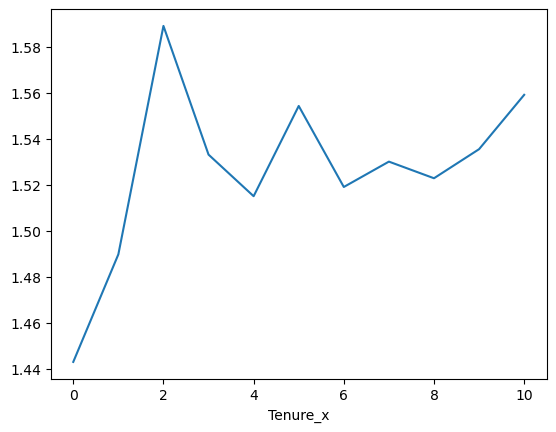

In [270]:
# Products owned by tenure
merged_df.groupby('Tenure_x')['NumOfProducts'].mean().plot()

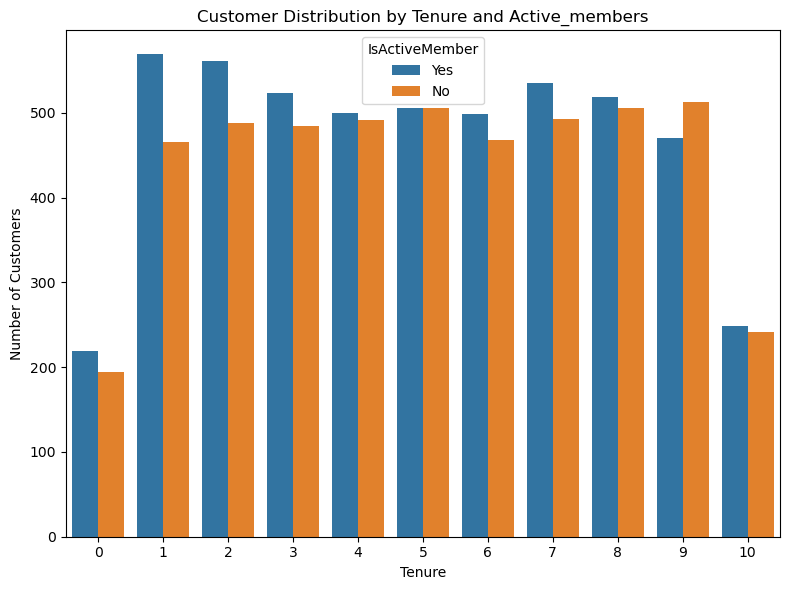

In [271]:
plt.figure(figsize=(8, 6))
sns.countplot(data=merged_df, x='Tenure_x', hue='IsActiveMember')
plt.title('Customer Distribution by Tenure and Active_members')
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.legend(title='IsActiveMember')
plt.tight_layout()
plt.show()

In [273]:
# Credit score by age group
merged_df['AgeGroup'] = pd.cut(merged_df['Age'], bins=[18, 30, 40, 50, 60, 100])
merged_df.groupby('AgeGroup')['CreditScore'].mean()




C:\Users\UNIK\AppData\Local\Temp\ipykernel_16228\154938852.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df.groupby('AgeGroup')['CreditScore'].mean()


AgeGroup
(18, 30]     651.016932
(30, 40]     651.373765
(40, 50]     648.813793
(50, 60]     646.761606
(60, 100]    654.549569
Name: CreditScore, dtype: float64

In [272]:
# Cross analysis
pd.crosstab(merged_df['Tenure_x'], merged_df['HasCrCard'])

HasCrCard,No,Yes
Tenure_x,,
0,194,219
1,466,569
2,488,561
3,485,524
4,492,500
5,506,506
6,468,499
7,493,535
8,506,519


<Axes: xlabel='Geography'>

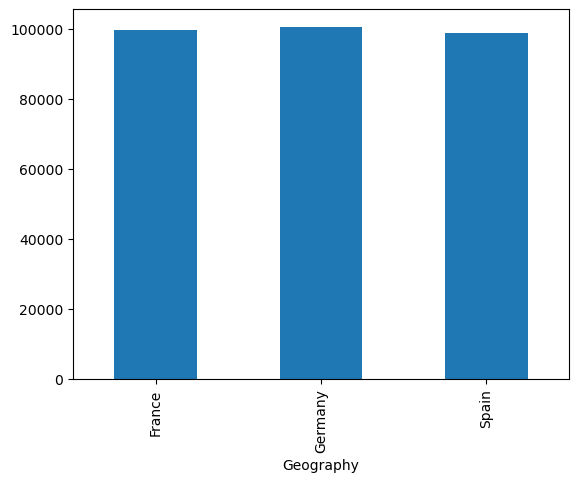

In [274]:
# Salary vs. geography
merged_df.groupby('Geography')['EstimatedSalary'].mean().plot(kind='bar')

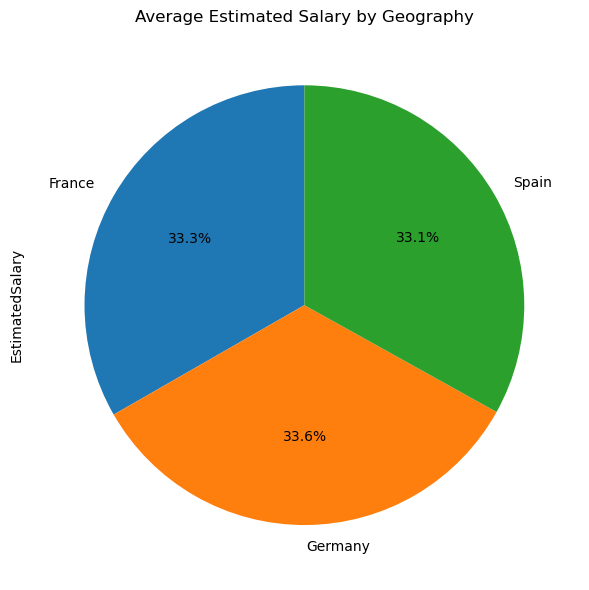

In [275]:
salary_by_geo = merged_df.groupby('Geography')['EstimatedSalary'].mean()

plt.figure(figsize=(8, 6))
salary_by_geo.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Average Estimated Salary by Geography')
plt.tight_layout()
plt.show()


<Axes: title={'center': 'Average Estimated Salary by Gender'}, ylabel='EstimatedSalary'>

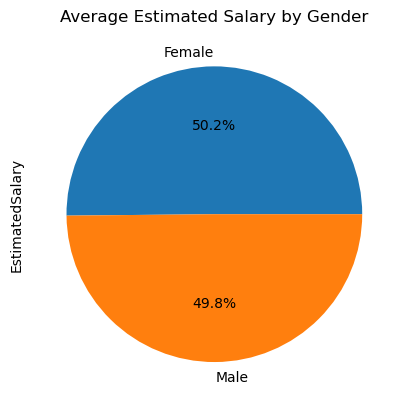

In [281]:
merged_df.groupby('Gender')['EstimatedSalary'].mean().plot(
    kind='pie',
    autopct='%1.1f%%',
    title='Average Estimated Salary by Gender'
)


C:\Users\UNIK\AppData\Local\Temp\ipykernel_16228\869841921.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df.groupby('AgeGroup')['EstimatedSalary'].mean().plot(kind='bar')


<Axes: xlabel='AgeGroup'>

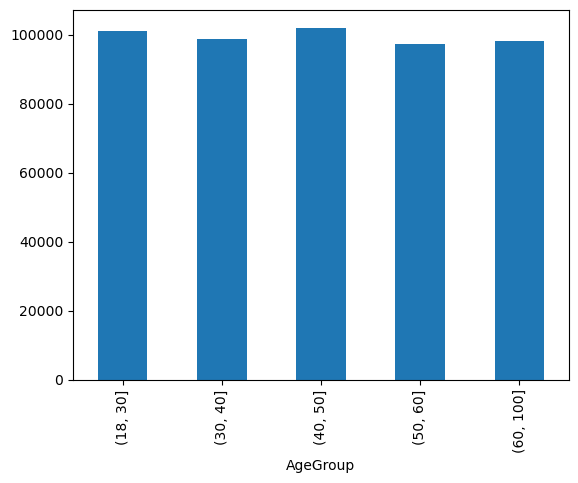

In [280]:
merged_df.groupby('AgeGroup')['EstimatedSalary'].mean().plot(kind='bar')

<Axes: xlabel='Gender'>

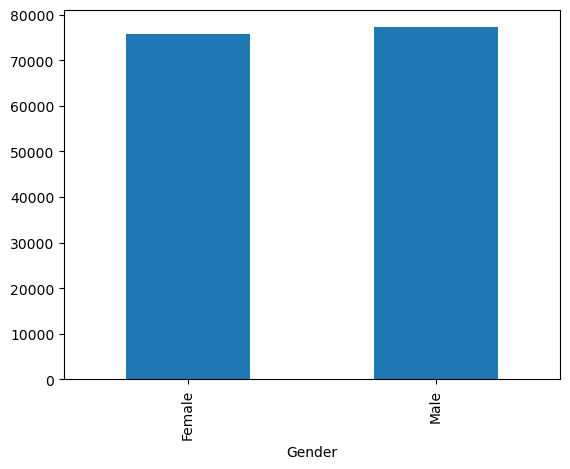

In [282]:
merged_df.groupby('Gender')['Balance'].mean().plot(kind='bar')

C:\Users\UNIK\AppData\Local\Temp\ipykernel_16228\2984998660.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df.groupby('AgeGroup')['Balance'].mean().plot(kind='bar')


<Axes: xlabel='AgeGroup'>

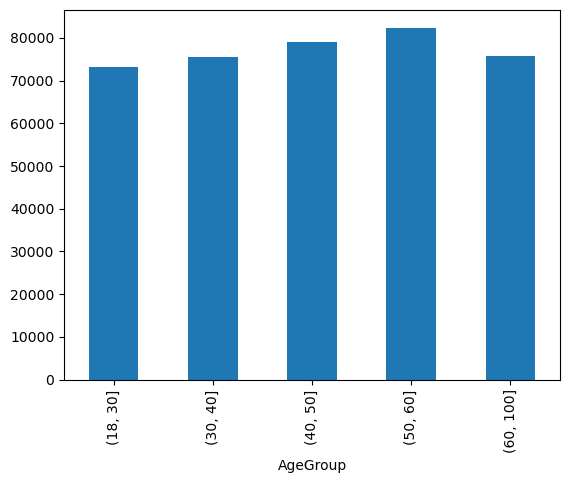

In [283]:
merged_df.groupby('AgeGroup')['Balance'].mean().plot(kind='bar')

In [276]:
#CHURN ANALYSIS

<Axes: xlabel='Geography'>

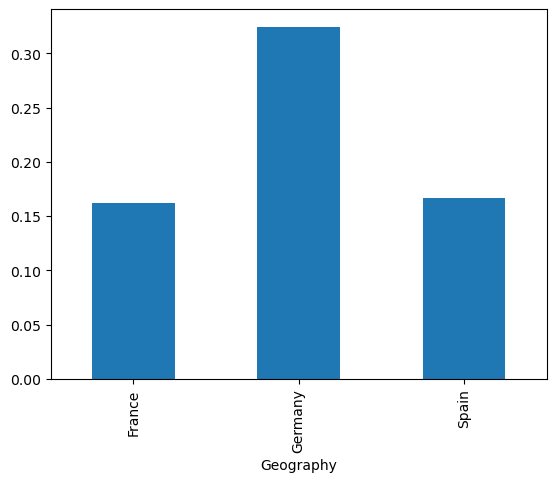

In [277]:
merged_df.groupby('Geography')['Exited'].mean().plot(kind='bar')

<Axes: xlabel='Gender'>

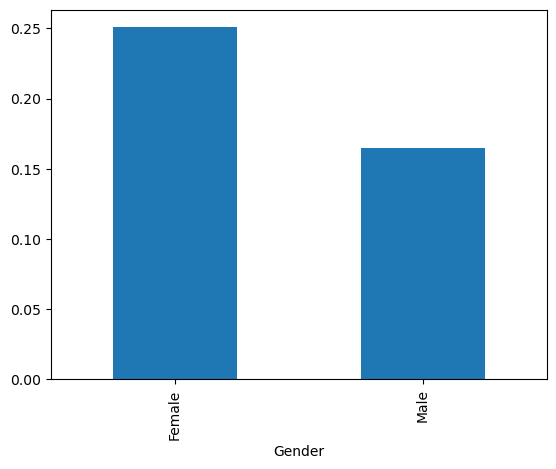

In [278]:
# Compare by Exit status
merged_df.groupby('Gender')['Exited'].mean().plot(kind='bar')

C:\Users\UNIK\AppData\Local\Temp\ipykernel_16228\1124255266.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df.groupby('AgeGroup')['Exited'].mean().plot(kind='bar')


<Axes: xlabel='AgeGroup'>

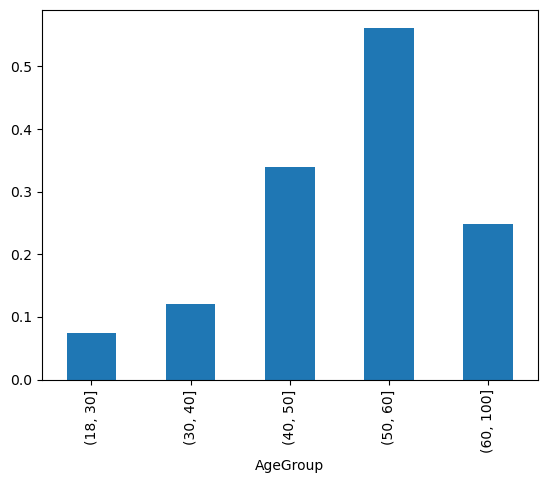

In [279]:
# Age vs. Exit
merged_df.groupby('AgeGroup')['Exited'].mean().plot(kind='bar')

In [ ]:
# Balance comparison
sns.boxplot(x='Exited', y='Balance', data=merged_df)

In [ ]:
#tenure vs exited
sns.boxplot(x='Exited', y='Tenure_x', data=merged_df)

In [ ]:
#numberof products vs exited
merged_df.groupby('NumOfProducts')['Exited'].mean().plot(kind='bar')

### Recommendations

1. **Gender-Based Financial Targeting**
   - Market investment and premium financial products to higher-earning gender groups.
   - Offer financial planning tools to lower-earning groups to boost long-term engagement.

2. **Regional Optimization**
   - Invest in regional marketing and customer engagement strategies in underperforming geographies.
   - Provide localized offers or support to increase retention in high-churn regions.

3. **Tenure and Engagement**
   - Introduce loyalty programs to reward long-term customers.
   - Promote bundled products (e.g., savings + credit card) to increase product ownership among long-tenured clients.

4. **Customer Exit (Churn) Risk**
   - Launch proactive retention campaigns with personalized messages or incentives.